In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [7]:
dfo1hrun1 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun2 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun3 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1hrun4 = pd.read_csv('../Data/Cement_sample/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)

In [8]:
dfO1h = pd.concat([dfo1hrun1['Delays'], dfo1hrun1['Time-delay1'], dfo1hrun2['Time-delay2'], dfo1hrun3['Time-delay3'], 
                  dfo1hrun4['Time-delay4']], axis=1)
dfO1h = dfO1h.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")

dfO1h['mean'] = dfO1h.iloc[:, 1:].mean(axis=1)
dfO1h['std'] = dfO1h.iloc[:, 1:].std(axis=1)

In [17]:
# Initial Data import
path = 'c:/Users/Jacob/Nonlinearity/Data/'

dfO1_i = pd.read_csv(path+'NS5/Initial/O1/2020-11-25/wiggles.txt', delimiter=' ', header=None, names=
                     ['Time Delays 1'])
dfO2_i = pd.read_csv(path+'NS5/Initial/O2/Run1.txt', delimiter=' ')

# Fracture Data import
dfO1_f = pd.read_csv(path+'NS5/Fracture/O1/2020-12-07/Trial1/10.0V/Delays.txt', delimiter=' ', header=None, names=
                     ['Delays', 'Time Delays 1', 'Time Delays 2', 'Time Delays 3', 'Time Delays 4'])
dfO2_f = pd.read_csv(path+'NS5/Fracture/O2/2020-12-07_02/Trial1/10.0V/Delays.txt', delimiter=' ', header=None, names=
                     ['Time Delays 4'])

# Concatinate all NS3 data in one data frame
dfNS5 = pd.concat([dfO1_f['Delays'], dfO1_i['Time Delays 1'], dfO2_i['Time-delay2'], dfO1_f['Time Delays 3'], 
                  dfO2_f['Time Delays 4']], axis=1)
dfNS5 = dfNS5.rename(columns={"Time Delays 1": "Initial; O1", "Time-delay2": "Initial; O2", "Time Delays 3": "Post; O1", 
                            "Time Delays 4": "Post; O2"}, errors="raise")
dfNS5

,Delays,Initial; O1,Initial; O2,Post; O1,Post; O2
0,0.0,0.191771,-2.468272,-0.296883,-3.160742
1,1.0,0.817791,-1.803474,0.202592,-2.147649
2,2.0,2.275839,-1.461645,0.317682,-1.648753
3,3.0,1.437710,-2.561889,1.396451,-1.240646
4,4.0,1.555720,-1.059172,0.638579,-0.752634
...,...,...,...,...,...
95,95.0,6.502014,5.539523,6.123060,6.465671
96,96.0,6.334628,5.075840,6.174341,6.714223
97,97.0,6.202889,4.928840,5.793332,6.351508
98,98.0,6.420945,4.508787,5.724948,6.381590


In [15]:
dfO1_Al = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/Al/O1/delays-from-all-runs/run1.txt',
                     delimiter=' ')
dfO1_Al['Time-delay1'][:15] = dfO1_Al['Time-delay1'][15:30]


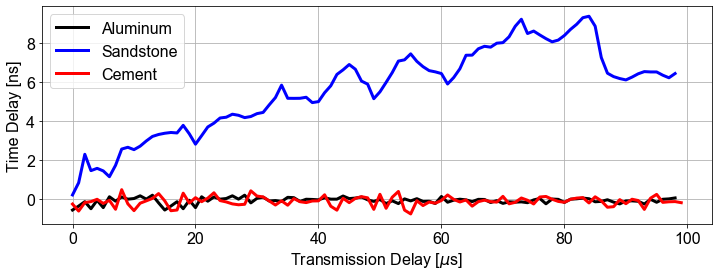

In [47]:
plt.figure(figsize=(12,4))
plt.plot(dfO1_Al['Delays'], dfO1_Al['Time-delay1'], 'k', label='Aluminum', linewidth=3)
plt.plot(dfNS5['Delays'], dfNS5['Initial; O1'],'b', label='Sandstone', linewidth=3)
plt.plot(dfO1h['Delays'], dfO1h['Run4'], 'r', label='Cement', linewidth=3)
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
plt.legend()
plt.grid()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Set-up/Al-Cement-Sandstone.pdf', dpi=300, 
#             bbox_inches='tight', format='pdf')
plt.show()